In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
func = lambda x: 0.5*np.linalg.norm(A @ x - b)**2
grad = lambda x: A.T @ (A @ x - b)

In [14]:
dat_file = np.load('data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
#A_test = dat_file['A_test']
#b_test = dat_file['b_test']
x0 = np.random.rand(28)


In [15]:
def ternary_search(xk, zk, func):
    a = 0.
    b = 1. 
    while b - a > 1e-3:
        c = a + (b - a) / 3
        d = a + (b - a) / 3 * 2
        if func(xk*c+zk*(1-c)) >= func(xk*d+zk*(1-d)):
            a = c
        else:
            b = d 
    print((b + a)/2)
    return (b+a)/2


In [16]:
def a_next(ak, L):
    return 1 / L * 0.5 + (1 / L**2 * 0.25 + ak**2)**0.5


In [17]:
def y_next(xk, zk):
    return ternary_search(xk, zk, func)


In [18]:
def x_next(xk, grad, ak_next, yk_next):
    return xk - ak_next * grad(yk_next)


In [19]:
def fast_grad_step_v3(ak_next, xk_next, a_bigk, zk):
    return (ak_next * xk_next + a_bigk * zk) / (a_bigk + ak_next)

In [20]:
xk = x0
zk= x0
yk = x0
L = np.amax(np.linalg.eigh(A.T @ A)[0])
ak = 1 / L
res = [func(xk)]
#while True:
for i in range(1,100):
    a_bigk = 1000 / i**0.5
    ak = a_next(ak, L) 
    alpha = ternary_search(xk, zk, func)
    yk = xk * alpha + zk * (1 - alpha)
    xk = x_next(xk, grad, ak, yk)
    zk = xk * alpha + zk * (1 - alpha)
    res.append(func(zk))
    
#print(zk)
   # if abs(res[-1] - res[-2]) < 1e-9:
      #  break


0.9996616802577005
0.9996616802577005
0.0003383197422994323
0.3965853494134638
0.10157765300843444
0.1342457445506967
0.3170429842702511
0.04510803247682649
0.16872567625095325
0.07274609578018469
0.10043582387817385
0.08921522991521492
0.057120365670696366
0.05678204592839693
0.061726998646166084
0.07038314383006211
0.0820323780036321
0.08674837019267713
0.07141396179488069
0.047891240981836655
0.031701947493024824
0.022793631856677564
0.017601877530023978
0.014052163358866651
0.012192726337713133
0.010908168566169975
0.010337254001039683
0.009956644290952821
0.010168094129889968
0.010590993807764258
0.01162181177258284
0.013227508987011784
0.015421301065984666
0.017601877530023978
0.020560192932903967
0.022487029590218706
0.02296279172782728
0.021598940266682694
0.019756683544942817
0.017419502043940688
0.015421301065984666
0.014136743294441508
0.012784785886737138
0.011875551579307414
0.011500228115193982
0.010590993807764258
0.010168094129889968
0.009480882153344247
0.0085927928298

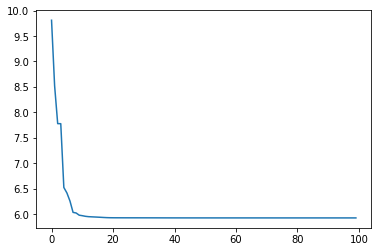

In [21]:
plt.plot(np.log(res))
plt.show()
